# Netflix Titles Analysis

This is just a simple data analysis of the different Movies and TV Shows that are available on Netflix. The data was downloaded from Kaggle.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
df = pd.read_csv('netflix_titles1.csv',parse_dates=True)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6232 entries, 0 to 6231
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       6232 non-null   int64         
 1   type          6232 non-null   object        
 2   title         6232 non-null   object        
 3   director      4263 non-null   object        
 4   cast          5664 non-null   object        
 5   country       5758 non-null   object        
 6   date_added    6221 non-null   datetime64[ns]
 7   release_year  6232 non-null   int64         
 8   rating        6232 non-null   object        
 9   duration      6232 non-null   object        
 10  listed_in     6232 non-null   object        
 11  description   6232 non-null   object        
 12  year          6221 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(9)
memory usage: 633.1+ KB


In [4]:
len(df)

6232

In [5]:
df.isnull().sum()/len(df)

show_id         0.000000
type            0.000000
title           0.000000
director        0.315950
cast            0.091142
country         0.076059
date_added      0.001765
release_year    0.000000
rating          0.000000
duration        0.000000
listed_in       0.000000
description     0.000000
dtype: float64

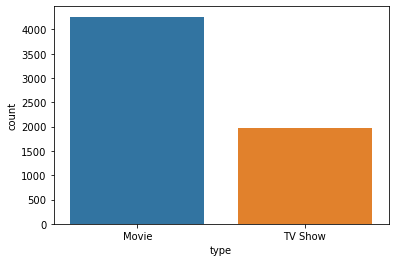

In [6]:
sns.countplot(x='type',data=df)

In [7]:
df['type'].value_counts()

Movie      4263
TV Show    1969
Name: type, dtype: int64

In [35]:
df = df.dropna()

In [36]:
df['date_added'] = pd.to_datetime(df['date_added'])

In [67]:
df['year'] = df['date_added'].dt.year
df['month'] = df['date_added'].dt.month

cols = ['year','month']

for col in cols:
    df[col] = df[col].astype(int)   

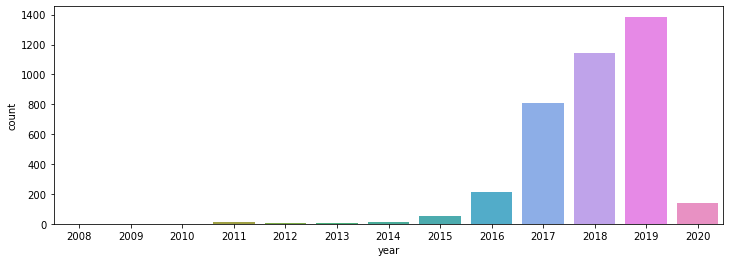

In [68]:
plt.figure(figsize=(12,4))
sns.countplot(x='year',data=df)

We see that most of the titles have been added to Netflix in the year 2019 followed by 2018 and then 2017.

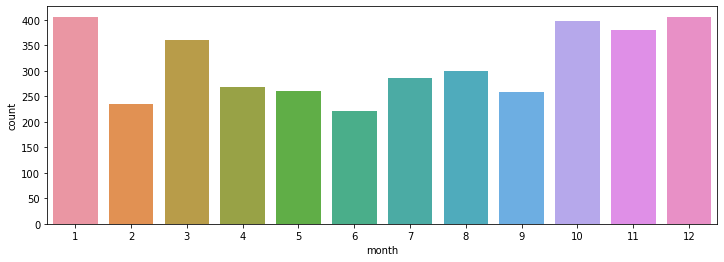

In [69]:
plt.figure(figsize=(12,4))
sns.countplot(x='month',data=df)

We see that most of the titles have been added in the months of December, October and January. A reason for this maybe the fact that in the months of December and January, there are Christmas and New Year holidays and maybe in order for people to watch these movies and TV Shows, releasing it during that time would be perfect to get more viewers.

In [39]:
r_year = df.sort_values('release_year',ascending = True)

In [51]:
r_year[['title','release_year','type','director']].head(10)

,title,release_year,type,director
2013,The Battle of Midway,1942,Movie,John Ford
2021,Tunisian Victory,1944,Movie,"Frank Capra, John Huston, Hugh Stewart, Roy Bo..."
2005,Know Your Enemy - Japan,1945,Movie,"Frank Capra, Joris Ivens"
2006,Let There Be Light,1946,Movie,John Huston
2930,The Stranger,1946,Movie,Orson Welles
2020,Thunderbolt,1947,Movie,"William Wyler, John Sturges"
2981,White Christmas,1954,Movie,Michael Curtiz
1401,Rebel Without a Cause,1955,Movie,Nicholas Ray
1369,Forbidden Planet,1956,Movie,Fred M. Wilcox
1354,Cat on a Hot Tin Roof,1958,Movie,Richard Brooks


A list of some of the oldest movies that are available to watch on Netflix. The oldest one here is The Battle of Midway which was released way back in 1942 and directed by John Ford.

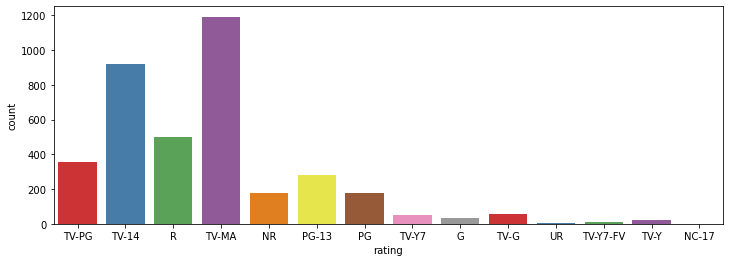

In [90]:
plt.figure(figsize=(12,4))
sns.countplot(x='rating',data=df,palette='Set1')

We can see that most of the titles are rated TV-MA or  TV-14. Next, let us check out how many Movies and TV Shows are rated in different categories of ratings.

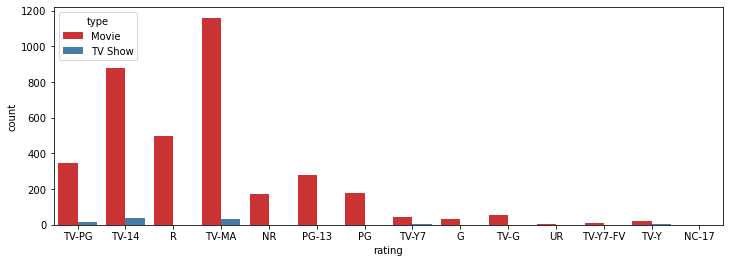

In [64]:
plt.figure(figsize=(12,4))
sns.countplot(x='rating',data=df,palette='Set1',hue='type')

There are lot of movies that are rated TV-MA and for TV Shows, we mostly see them rated TV-PG, TV-14 and TV-MA.

Text(0.5, 1.0, 'Top 10 Movie Genres')

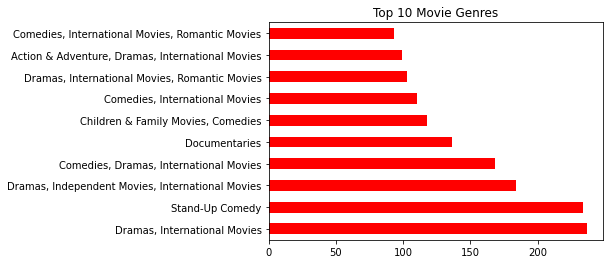

In [83]:
df[df['type'] == 'Movie']['listed_in'].value_counts()[:10].plot(kind='barh',color='red')
plt.title("Top 10 Movie Genres")

Text(0.5, 1.0, 'Top 10 TV Show Genres')

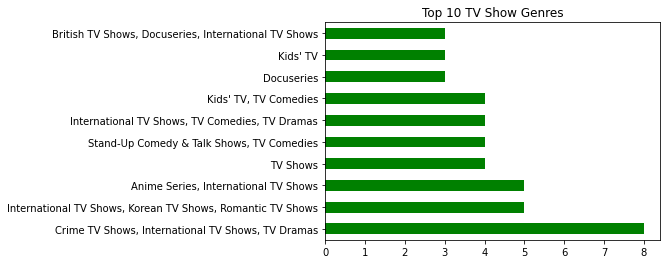

In [82]:
df[df['type'] == 'TV Show']['listed_in'].value_counts()[:10].plot(kind='barh',color='green')
plt.title("Top 10 TV Show Genres")

We can see that when it comes to Movies, there are a lot of movies in the Dramas, International Movies and Stand-Up Comedy category.

When it comes to TV Shows, there are a lot of shows in the Crime TV Shows, International TV Shows and TV Dramas.

(-0.5, 1199.5, 999.5, -0.5)

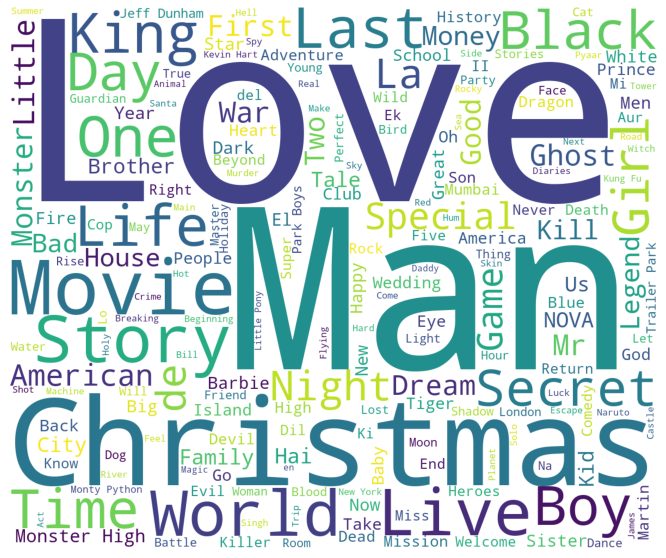

In [91]:
from wordcloud import WordCloud

plt.subplots(figsize=(20,10))
wordcloud = WordCloud(background_color='White',
                          width=1200,
                          height=1000).generate(" ".join(df.title))
plt.imshow(wordcloud)
plt.axis('off')